1. Модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка:  +𝑐∗∑𝑗𝑤2𝑗  а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.
____

2. Создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

____________________

In [3]:
class LinearModel_1:

    def __init__(self, alpha=0.001, iter_num=1000, intercept=True, reg_method=None, reg_lambda=0.001):
        self.alpha = alpha
        self.iter_num = iter_num
        self.intercept = intercept
        self.reg_method = reg_method
        self.reg_lambda = reg_lambda

        self.w = None
        self.X = None
        self.y = None

    def mse_calculation(self, y, y_pred):
        mse_err = np.mean((y - y_pred)**2)
        return mse_err

    def mae_calculation(self, y, y_pred):
        mae_err = np.mean((y - y_pred)**2)
        return mae_err

    def grad_w(self, X, w, y):
        grad_values_w = 2 * np.dot(X.T, np.dot(X, w)-y)/X.shape[0]
        return grad_values_w

    def stochastic_grad_w(self, X, w, y):  # TODO
        pass

    def intercept_add(self, X):
        ones = np.ones(X.shape[0])
        X = np.concatenate((X, np.c_[ones]), axis=1)
        return X

    def reg_lambda_item(self, w, reg_lambda):
        if self.reg_method == "Ridge" or self.reg_method == "L2":
            reg_item = 2 * reg_lambda * w
        elif self.reg_method == "Lasso" or self.reg_method == "L1":
            reg_item = reg_lambda * np.sign(w)
        else:
            reg_item = 0
        return reg_item

    def fit(self, X, y, iter_num=None, alpha=None, reg_lambda=None, verbose=False):

        # TODO проверка размерностей
        if reg_lambda is not None:
            self.reg_lambda = reg_lambda
        if alpha is not None:
            self.alpha = alpha
        if self.intercept:
            X = self.intercept_add(X)
        if iter_num is not None:
            self.iter_num = iter_num

        w = np.zeros(X.shape[1])
        w_previous = w + np.inf
        for i in range(1, self.iter_num+1):
            w -= self.alpha * (self.grad_w(X, w, y) +
                               self.reg_lambda_item(w, self.reg_lambda))
            delta = np.linalg.norm(w_previous - w, ord=2)
            w_previous = w.copy()
            if verbose:
                if i % 10 == 0:
                    print(
                        f'Итерация № {i}, скорость обучения: {self.alpha},коэффициент регулизации: {self.reg_lambda}\n'
                        f'вектор весов: {w},  дельта: {delta}')
        self.w = w
        return self.w, delta

    def predict(self, X):
        if self.intercept:
            X = self.intercept_add(X)
        if self.w is not None:
            y_pred = np.dot(X, self.w)
        return y_pred

    def optimizing(self, X, y,
                   alpha_list: list,
                   reg_lambda: float,
                   max_iter=300,
                   iter_step=1,
                   stop_eps=1e-10,
                   reg_method='Ridge',
                   verbose=True
                   ):
        fl = 0

        n_iter = 2
        while not fl:
            for alpha in alpha_list:
                w, delta = self.fit(X, y, n_iter, reg_lambda)
                if verbose:
                    print(
                        f'Кол-во итераций {n_iter}, скорость обучения: {alpha}, регуляризация: {self.reg_lambda}\n'
                        f'вектор весов: {w}, дельта: {delta}')
                if delta < stop_eps and n_iter > 3:
                    fl = 1
                    return n_iter, alpha, reg_lambda
                    break
            n_iter += iter_step
            if n_iter > max_iter:
                break
                print(f'градиентный спуск при заданных параметрах не сходится')
                return None, None, None

_____

In [4]:
def func(x):
    return 107.6 - 17.2 * x - 5.3 * x ** 2 + 7.7 * x ** 3 # задаем функцию

np.random.seed(13)
x_data = np.sort(np.random.uniform(-10, 10, 10))
f_data = [func(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [5]:
def generate_features(X, max_power):
        X=X[:, np.newaxis]
        return np.concatenate([X**i for i in range(1, max_power+1)], axis=1)

In [6]:
# создадим матрицы Х с разными степенями
X = x_data.reshape(-1,1)
X_3 = generate_features(x_data, 3)
X_5 = generate_features(x_data, 5)


In [7]:
# cоздадим модель x в степени 1

model_power_1 = LinearModel_1()
w1, _ = model_power_1.fit(X, f_data, 300, 0.005)
y_pred = model_power_1.predict(X)

In [8]:
# cоздадим модель x в степени 3

model_power_3 = LinearModel_1()
w3, _ = model_power_3.fit(X_3, f_data, 800, 0.0000001)
y_pred_3 = model_power_3.predict(X_3)

In [19]:
# cоздадим модель x в степени 5 OVERFITTED

model_power_5 = LinearModel_1()
w5, _ = model_power_5.fit(X_5, f_data, 20000000, 0.0000000001) # весьма долго
y_pred_5 = model_power_5.predict(X_5)

In [21]:
def func_predicted(x, w):
    res = 0
    for num, el in enumerate(w, 1):
        if num < len(w):
            res +=el*x**num
    res += w[-1]
    return res

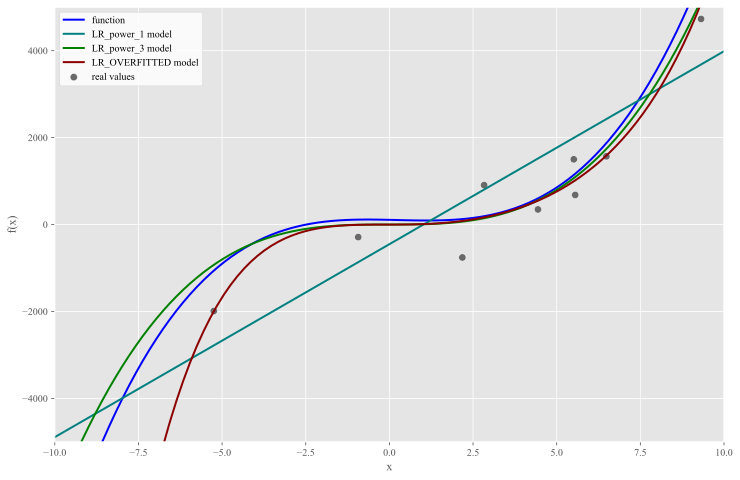

In [22]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))
plt.plot(x, func(x), color='b', linewidth=2, label='function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.scatter(x_data, f_data, edgecolors='white', s=55, c='dimgray', label='real values')
plt.plot(x, func_predicted(x, w1), color='teal', linewidth=2, label='LR_power_1 model')
plt.plot(x, func_predicted(x, w3), color='g', linewidth=2, label='LR_power_3 model')
plt.plot(x, func_predicted(x, w5), color='darkred', linewidth=2, label='LR_OVERFITTED model')

plt.legend(loc ='best', facecolor='white')
plt.show()

In [23]:
print(f'Модель на признаках в 1 степени получила вектор весов:\n{w1},\n'
      f'MSE = {round(model_power_1.mse_calculation(f_data, y_pred), 3)}')
print('*'*100, '\n')

print(f'Модель на признаках в 3 степени получила вектор весов:\n{w3},\n'
      f'MSE = {round(model_power_3.mse_calculation(f_data, y_pred_3), 3)}')
print('*'*100, '\n')

print(f'ПЕРЕОБУЧЕННАЯ Модель на признаках в 5 степени получила вектор весов:\n{w5},\n'
      f'MSE = {round(model_power_5.mse_calculation(f_data, y_pred_5), 3)}')
print('*'*100, '\n')

Модель на признаках в 1 степени получила вектор весов:
[ 443.94305871 -452.47639725],
MSE = 1160657.553
**************************************************************************************************** 

Модель на признаках в 3 степени получила вектор весов:
[ 0.13333978 -0.1122092   6.39393861 -0.02178558],
MSE = 317558.108
**************************************************************************************************** 

ПЕРЕОБУЧЕННАЯ Модель на признаках в 5 степени получила вектор весов:
[ 1.13603162  2.96836894  8.00233171 -0.85090103  0.06787906 -1.7392642 ],
MSE = 198179.882
**************************************************************************************************** 



In [13]:
# cоздадим модель x в степени 5 при использованием регулязации для предотвращения переобучения
# lambda = 1000
model_power_5_l2_1000 = LinearModel_1(reg_method='L2')
w5_l2_1000, _ = model_power_5_l2_1000.fit(X_5, f_data, 20000000, 0.0000000001, reg_lambda=1000)
y_pred_5_l2_1000 = model_power_5_l2_1000.predict(X_5)
model_power_5_l2_1000.mse_calculation(f_data, y_pred_5_l2_1000)

207258.98615151554

In [14]:
# cоздадим модель x в степени 5 при использованием регулязации для предотвращения переобучения
# lambda = 3000
model_power_5_l2_3000 = LinearModel_1(reg_method='L2')
w5_l2_3000, _ = model_power_5_l2_3000.fit(X_5, f_data, 20000000, 0.0000000001, reg_lambda=3000)
y_pred_5_l2_3000 = model_power_5_l2_3000.predict(X_5)
model_power_5_l2_1000.mse_calculation(f_data, y_pred_5_l2_3000)

245053.90713428246

In [15]:
# cоздадим модель x в степени 5 при использованием регулязации для предотвращения переобучения
# lambda = 5000
model_power_5_l2_5000 = LinearModel_1(reg_method='L2')
w5_l2_5000, _ = model_power_5_l2_5000.fit(X_5, f_data, 20000000, 0.0000000001, reg_lambda=5000)
y_pred_5_l2_5000 = model_power_5_l2_5000.predict(X_5)
model_power_5_l2_1000.mse_calculation(f_data, y_pred_5_l2_5000)

284211.00102261244

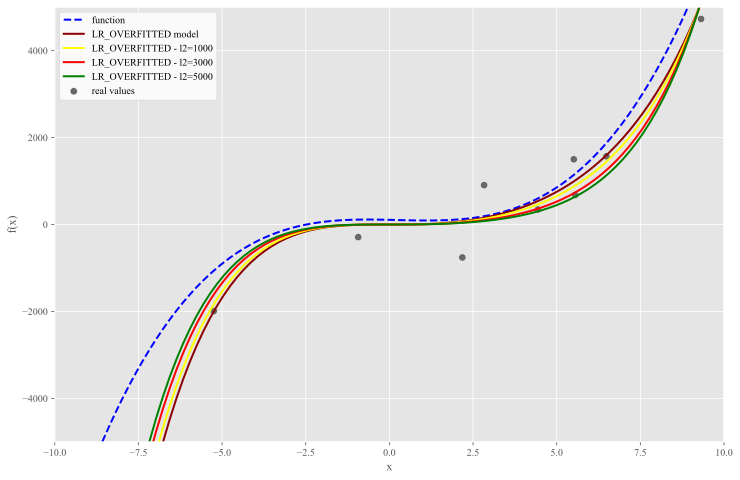

In [18]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.scatter(x_data, f_data, edgecolors='white', s=55, c='dimgray', label='real values')
plt.plot(x, func(x), 'b--', linewidth=2, label='function')
# plt.plot(x, func_predicted(x, w3), 'g--', linewidth=2, label='LR_power_3 model')
plt.plot(x, func_predicted(x, w5), color='darkred', linewidth=2, label='LR_OVERFITTED model')
plt.plot(x, func_predicted(x, w5_l2_1000), color='yellow', linewidth=2, label='LR_OVERFITTED - l2=1000')
plt.plot(x, func_predicted(x, w5_l2_3000), color='red', linewidth=2, label='LR_OVERFITTED - l2=3000')
plt.plot(x, func_predicted(x, w5_l2_5000), color='green', linewidth=2, label='LR_OVERFITTED - l2=5000')

plt.legend(loc ='best', facecolor='white')
plt.show()